In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="notebook",font_scale=1.2)
import pandas as pd
# disable setting with copy warning
pd.options.mode.chained_assignment = None
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import pydicom

In [2]:
metrics = (
    f"test/old_subgroupAUROC", f"test/young_subgroupAUROC",
    f"test/female_subgroupAUROC", f"test/male_subgroupAUROC",
    f"test/AUROC"
)

In [3]:
def load_csvs_into_df(dir):
    dirs = [os.path.join(dir,d) for d in os.listdir(dir) if os.path.isdir(os.path.join(dir,d))]
    dfs = []
    sample_dfs = []
    for d in dirs:
        seeds = [f for f in os.listdir(os.path.join('./',d)) if f.startswith('seed')]
        # get last number from directory name
        train_loader_num = int(d.split('_')[-1])
        for seed in seeds:
            #print(os.path.join(d,seed))
            results = [f for f in os.listdir(os.path.join(d,seed)) if f.startswith('test_results')][0]
            sample_info = [f for f in os.listdir(os.path.join(d,seed)) if f.startswith('train_loader')][0]
            results_df = pd.read_csv(os.path.join(d, seed, results))
            sample_df = pd.read_csv(os.path.join(d, seed, sample_info))
            results_df["train_loader_num"] = train_loader_num
            sample_df["train_loader_num"] = train_loader_num
            dfs.append(results_df)
            sample_dfs.append(sample_df)
    return pd.concat(dfs, ignore_index=True), pd.concat(sample_dfs, ignore_index=True)

# Single Samples

In [4]:
df_1_fae, df_samples_1_fae= load_csvs_into_df('src/logs_persist/dataset_distillation/distillation_paper/2023-11-03 14:14:39-FAE-rsna-balanced-bs32-balanced-dataset-distillation-fullmodel-nsamples1-noDP')
df_1_fae["n_samples"] = 1
df_1_fae["model"] = "FAE"
df_samples_1_fae.shape

(8450, 5)

In [5]:
df = df_1_fae[[*metrics,'model']]

In [6]:
df = pd.melt(df, id_vars=['model'], var_name="metric", value_name="value")
df.head()

,model,metric,value
0,FAE,test/old_subgroupAUROC,0.61485
1,FAE,test/old_subgroupAUROC,0.43350
2,FAE,test/old_subgroupAUROC,0.64340
3,FAE,test/old_subgroupAUROC,0.51520
4,FAE,test/old_subgroupAUROC,0.60645


value                               \
                                  count      mean       std      min   
model metric                                                           
FAE   test/AUROC                 8450.0  0.532999  0.072235  0.25155   
      test/female_subgroupAUROC  8450.0  0.507494  0.060992  0.26080   
      test/male_subgroupAUROC    8450.0  0.558505  0.103277  0.23885   
      test/old_subgroupAUROC     8450.0  0.555900  0.086881  0.23170   
      test/young_subgroupAUROC   8450.0  0.510098  0.068768  0.26535   

                                                                         
                                      25%       50%       75%       max  
model metric                                                             
FAE   test/AUROC                 0.484162  0.545975  0.589684  0.702913  
      test/female_subgroupAUROC  0.471500  0.513050  0.551650  0.658950  
      test/male_subgroupAUROC    0.483913  0.578600  0.642150  0.762525  
      test/old_subgroupAUROC     0.499250  0.570800  0.623788  0.731250  
      test/young_subgroupAUROC   0.462612  0.518700  0.563350  0.701975

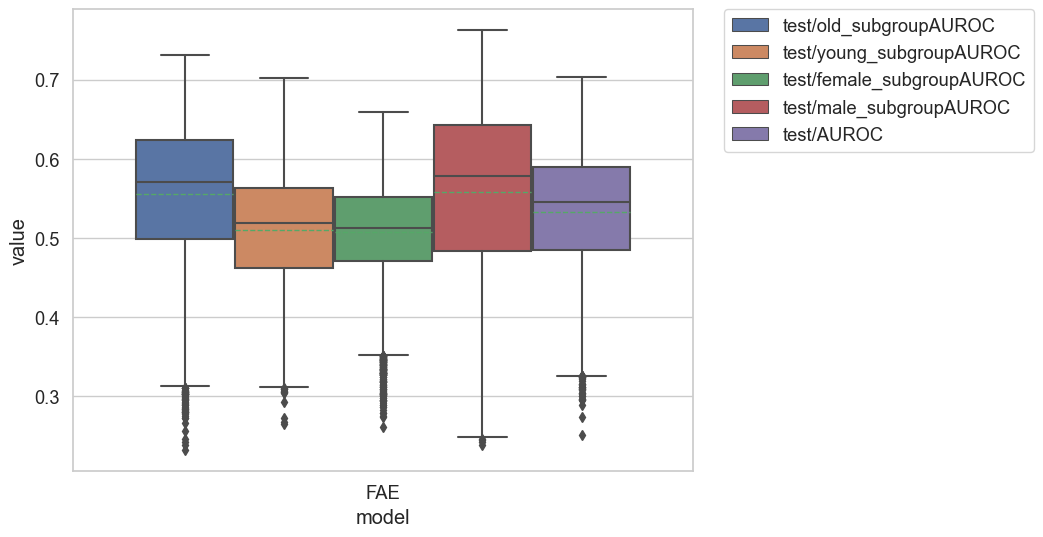

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="model", y="value", hue="metric", meanline=True, showmeans=True)
# legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# get statistics from each metric per model
df.groupby(["model","metric"]).describe()

# 5 Samples Sets

In [8]:
df_5_fae, df_samples_5_fae= load_csvs_into_df('src/logs_persist/dataset_distillation/distillation_paper/2023-11-01 22:36:51-FAE-rsna-balanced-bs32-balanced-dataset-distillation-fullmodel-nsamples5-noDP')
df_5_fae["n_samples"] = 5
df_5_fae["model"] = "FAE"
df_5_fae.shape

(1690, 82)

In [9]:
df = df_5_fae[[*metrics,'model']]

In [10]:
df = pd.melt(df, id_vars=['model'], var_name="metric", value_name="value")
df.head()

,model,metric,value
0,FAE,test/old_subgroupAUROC,0.70945
1,FAE,test/old_subgroupAUROC,0.53990
2,FAE,test/old_subgroupAUROC,0.72170
3,FAE,test/old_subgroupAUROC,0.63715
4,FAE,test/old_subgroupAUROC,0.67010


value                                \
                                  count      mean       std       min   
model metric                                                            
FAE   test/AUROC                 1690.0  0.627378  0.036075  0.476975   
      test/female_subgroupAUROC  1690.0  0.584975  0.041716  0.389750   
      test/male_subgroupAUROC    1690.0  0.669780  0.051538  0.454700   
      test/old_subgroupAUROC     1690.0  0.675020  0.044449  0.464600   
      test/young_subgroupAUROC   1690.0  0.579735  0.038291  0.433500   

                                                                        
                                      25%       50%       75%      max  
model metric                                                            
FAE   test/AUROC                 0.608813  0.633000  0.653394  0.70365  
      test/female_subgroupAUROC  0.559688  0.587525  0.615288  0.67685  
      test/male_subgroupAUROC    0.643000  0.679275  0.705463  0.76790  
      test/old_subgroupAUROC     0.650700  0.681325  0.706500  0.78250  
      test/young_subgroupAUROC   0.557500  0.585100  0.606950  0.66425

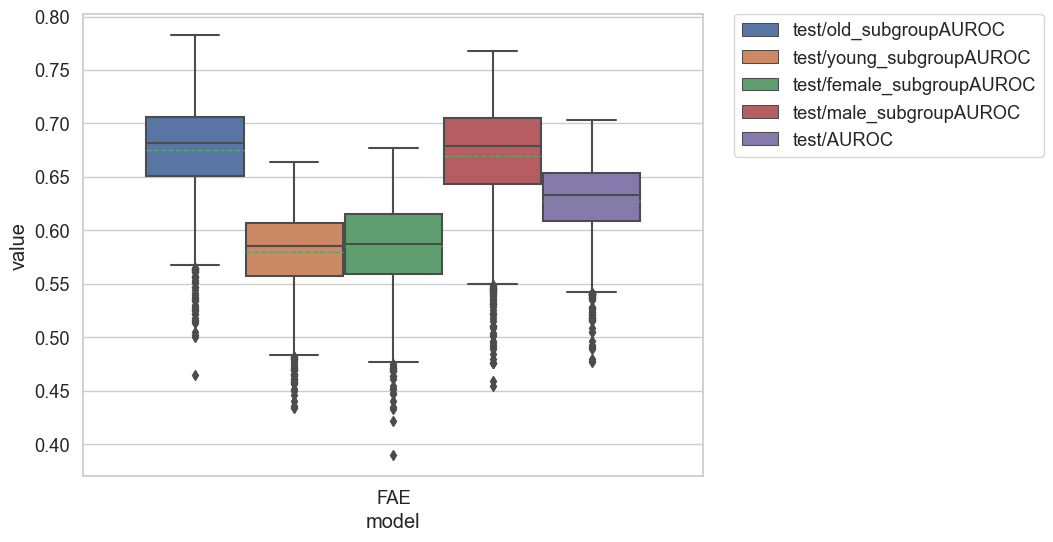

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="model", y="value", hue="metric", meanline=True, showmeans=True)
# legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# get statistics from each metric per model
df.groupby(["model","metric"]).describe()

# 10 Samples Sets

In [12]:
df_10_fae, df_samples_10_fae= load_csvs_into_df('src/logs_persist/dataset_distillation/distillation_paper/2023-11-01 22:36:51-FAE-rsna-balanced-bs32-balanced-dataset-distillation-fullmodel-nsamples10-noDP')
df_10_fae["n_samples"] = 10
df_10_fae["model"] = "FAE"
df_10_fae.shape

(845, 82)

In [13]:
df = df_10_fae[[*metrics,'model']]

In [14]:
df = pd.melt(df, id_vars=['model'], var_name="metric", value_name="value")
df.head()

,model,metric,value
0,FAE,test/old_subgroupAUROC,0.73680
1,FAE,test/old_subgroupAUROC,0.72890
2,FAE,test/old_subgroupAUROC,0.74040
3,FAE,test/old_subgroupAUROC,0.76685
4,FAE,test/old_subgroupAUROC,0.76670


value                                \
                                 count      mean       std       min   
model metric                                                           
FAE   test/AUROC                 845.0  0.671695  0.024239  0.567675   
      test/female_subgroupAUROC  845.0  0.623707  0.033977  0.490650   
      test/male_subgroupAUROC    845.0  0.719683  0.032426  0.591800   
      test/old_subgroupAUROC     845.0  0.733623  0.029899  0.621150   
      test/young_subgroupAUROC   845.0  0.609767  0.028047  0.512600   

                                                                       
                                      25%       50%      75%      max  
model metric                                                           
FAE   test/AUROC                 0.657025  0.674925  0.68895  0.72845  
      test/female_subgroupAUROC  0.601050  0.625700  0.64980  0.70640  
      test/male_subgroupAUROC    0.699650  0.724600  0.74365  0.78780  
      test/old_subgroupAUROC     0.713850  0.736650  0.75430  0.80590  
      test/young_subgroupAUROC   0.593100  0.611150  0.62990  0.67935

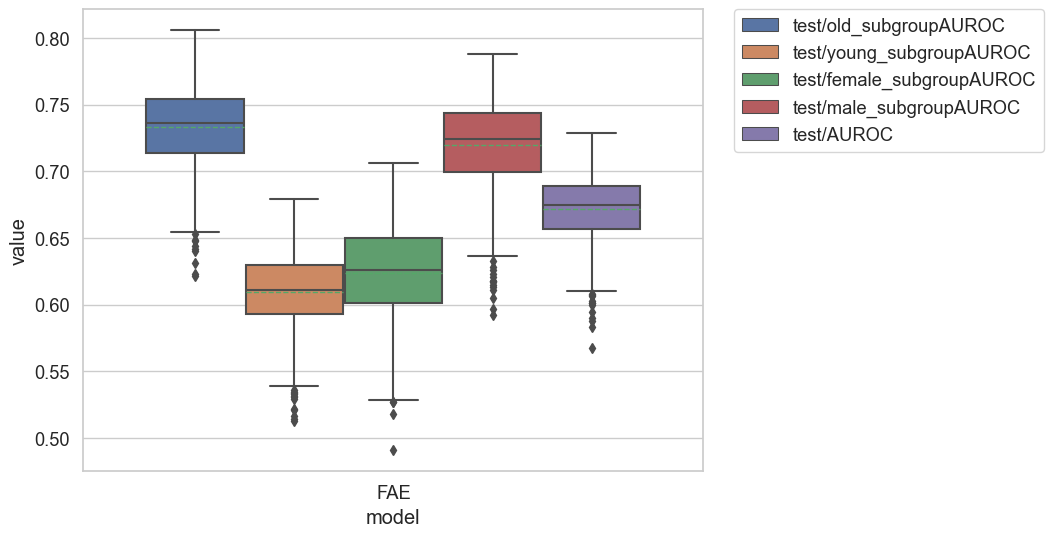

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="model", y="value", hue="metric", meanline=True, showmeans=True)
# legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# get statistics from each metric per model
df.groupby(["model","metric"]).describe()

# 20 Samples Sets

In [16]:
df_20_fae, df_samples_20_fae= load_csvs_into_df('src/logs_persist/dataset_distillation/distillation_paper/2023-11-01 22:36:51-FAE-rsna-balanced-bs32-balanced-dataset-distillation-fullmodel-nsamples10-noDP')
df_20_fae["n_samples"] = 20
df_20_fae["model"] = "FAE"
df_20_fae.shape

(845, 82)

In [17]:
df = df_20_fae[[*metrics,'model']]

In [18]:
df = pd.melt(df, id_vars=['model'], var_name="metric", value_name="value")
df.head()

,model,metric,value
0,FAE,test/old_subgroupAUROC,0.73680
1,FAE,test/old_subgroupAUROC,0.72890
2,FAE,test/old_subgroupAUROC,0.74040
3,FAE,test/old_subgroupAUROC,0.76685
4,FAE,test/old_subgroupAUROC,0.76670


value                                \
                                 count      mean       std       min   
model metric                                                           
FAE   test/AUROC                 845.0  0.671695  0.024239  0.567675   
      test/female_subgroupAUROC  845.0  0.623707  0.033977  0.490650   
      test/male_subgroupAUROC    845.0  0.719683  0.032426  0.591800   
      test/old_subgroupAUROC     845.0  0.733623  0.029899  0.621150   
      test/young_subgroupAUROC   845.0  0.609767  0.028047  0.512600   

                                                                       
                                      25%       50%      75%      max  
model metric                                                           
FAE   test/AUROC                 0.657025  0.674925  0.68895  0.72845  
      test/female_subgroupAUROC  0.601050  0.625700  0.64980  0.70640  
      test/male_subgroupAUROC    0.699650  0.724600  0.74365  0.78780  
      test/old_subgroupAUROC     0.713850  0.736650  0.75430  0.80590  
      test/young_subgroupAUROC   0.593100  0.611150  0.62990  0.67935

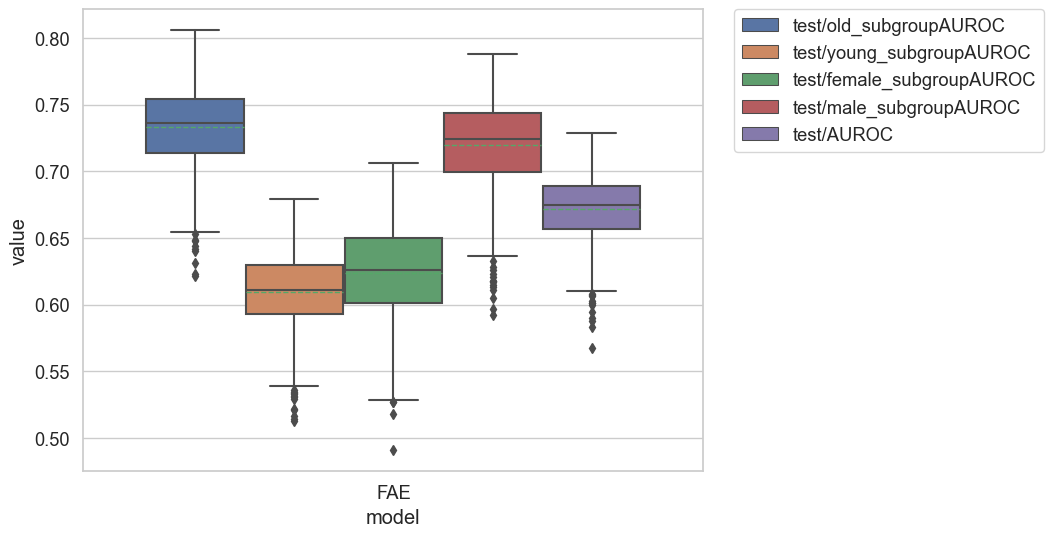

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="model", y="value", hue="metric", meanline=True, showmeans=True)
# legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# get statistics from each metric per model
df.groupby(["model","metric"]).describe()

# 30 Samples Sets

In [20]:
df_30_fae, df_samples_30_fae= load_csvs_into_df('src/logs_persist/dataset_distillation/distillation_paper/2023-11-01 22:36:51-FAE-rsna-balanced-bs32-balanced-dataset-distillation-fullmodel-nsamples10-noDP')
df_30_fae["n_samples"] = 30
df_30_fae["model"] = "FAE"
df_30_fae.shape

(845, 82)

In [21]:
df = df_30_fae[[*metrics,'model']]

In [22]:
df = pd.melt(df, id_vars=['model'], var_name="metric", value_name="value")
df.head()

,model,metric,value
0,FAE,test/old_subgroupAUROC,0.73680
1,FAE,test/old_subgroupAUROC,0.72890
2,FAE,test/old_subgroupAUROC,0.74040
3,FAE,test/old_subgroupAUROC,0.76685
4,FAE,test/old_subgroupAUROC,0.76670


value                                \
                                 count      mean       std       min   
model metric                                                           
FAE   test/AUROC                 845.0  0.671695  0.024239  0.567675   
      test/female_subgroupAUROC  845.0  0.623707  0.033977  0.490650   
      test/male_subgroupAUROC    845.0  0.719683  0.032426  0.591800   
      test/old_subgroupAUROC     845.0  0.733623  0.029899  0.621150   
      test/young_subgroupAUROC   845.0  0.609767  0.028047  0.512600   

                                                                       
                                      25%       50%      75%      max  
model metric                                                           
FAE   test/AUROC                 0.657025  0.674925  0.68895  0.72845  
      test/female_subgroupAUROC  0.601050  0.625700  0.64980  0.70640  
      test/male_subgroupAUROC    0.699650  0.724600  0.74365  0.78780  
      test/old_subgroupAUROC     0.713850  0.736650  0.75430  0.80590  
      test/young_subgroupAUROC   0.593100  0.611150  0.62990  0.67935

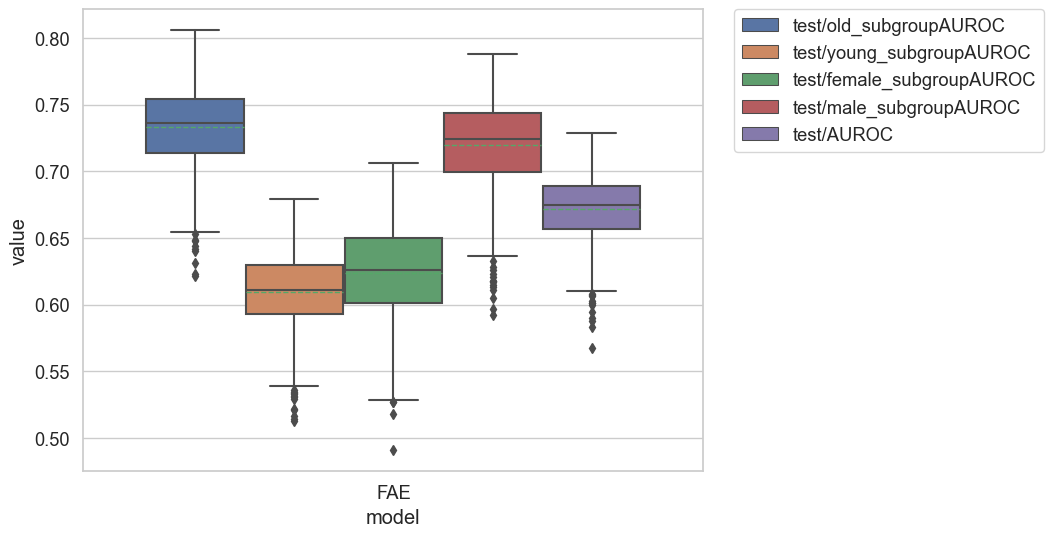

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="model", y="value", hue="metric", meanline=True, showmeans=True)
# legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# get statistics from each metric per model
df.groupby(["model","metric"]).describe()

# Compare AUROC of all

In [24]:
df = pd.concat([df_1_fae, df_5_fae, df_10_fae, df_20_fae, df_30_fae], ignore_index=True)
df.shape

(12675, 83)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'AUROC vs Number of Samples')

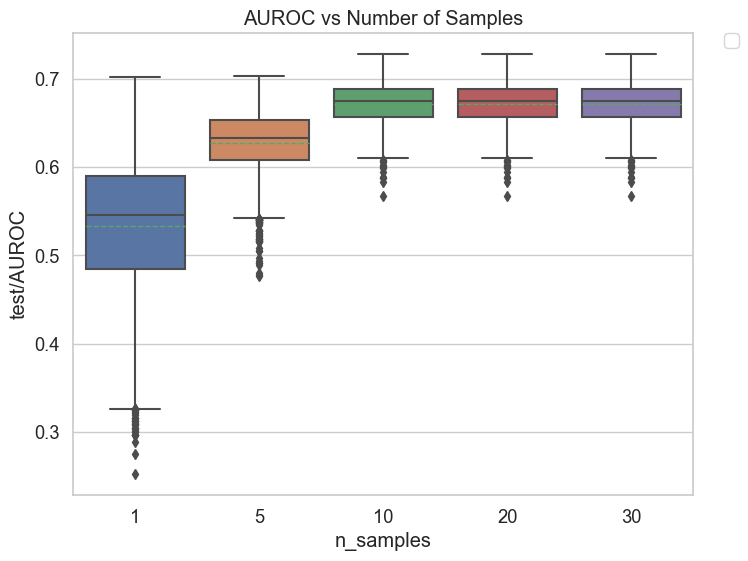

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="n_samples", y="test/AUROC", meanline=True, showmeans=True)
# legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("AUROC vs Number of Samples")